This notebook takes a first look at multiple datasets that we collected, including PSD R/V (from Chris Fairall), ATOMIC (from Cesar Sauvage), Bazzard Bay Tower (from Seth Zippel) and FLIP (from Luc Lenain).

In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
base = '/home/jw8736/mlflux/data/PSD/'

# Useful python packages to read .mat files
# https://stackoverflow.com/questions/874461/read-mat-files-in-python

### PSD R/V (from Chris Fairall)

In [2]:
ds = xr.load_dataset(base+'fluxes_all_cruises_compilation.nc')
ds_clean = ds.dropna(dim="time", how="any", 
                     subset=['taucx','taucy','hsc','hlc','U','tsnk','ta','qa'])

/ext3/miniconda3/lib/python3.11/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(
/ext3/miniconda3/lib/python3.11/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(


In [147]:
namelist = ['taucx','taucy','hsc','hlc'] + ['U','tsnk','ta','qa']

# U=x(:,3);%true wind speed, PSD sonic (m/s)
# tsnk=x(:,8);%sea snake temperature, PSD, 0.05 m depth (C)
# ta=x(:,9);%air temperature, PSD (C)
# qa=x(:,11);%air specific humidity, PSD (g/kg)

# hsc=x(:,12);%sensible heat flux, covariance (W/m^2)
# hlc=x(:,15);%latent heat flux, covariance, (W/m^2)
# taucx=x(:,18);%covariance streamwise stress (N/m^2)
# taucy=x(:,19);%covariance cross-stream stress (N/m^2)
# zu=x(:,36);%wind speed measurement height (m)
# zt=x(:,37);%air temperature measurement height (m)
# zq=x(:,38);% air humidity measurement height (m)

# U_scs=x(:,40); %true wind speed, ship anemometer (m/s)
# tsg=x(:,43);%ship water temperature, ~5 m depth, (C)
# ta_im=x(:,44);%ship air temperature (C)
# qa_im=x(:,46);%ship air specific humidity, (g/kg)
# RH=x(:,48); %PSD RH (%)

In [203]:
ds = xr.open_dataset(base+'WHOI/EUREC4A_ATOMIC_RonBrown_10min_nav_met_sea_flux_20200109-20200212_v1.3.nc')
atomic = ds.dropna(dim="obs", how="any",
                   subset=["tau_streamwise_cov","tau_bulk","wspd",'tsea','tair','qair'])
# 4002 samples

In [ ]:
# Metz =  77; Epic = 69; WHOTS = 87; STRATUS = 83; NEAQS = 78; HiWInGS = 72; GasEx = 71
# DYNAMO = 68; Calwater = 67; Capricorn = 73

1890


Text(0.5, 1.0, ' ')

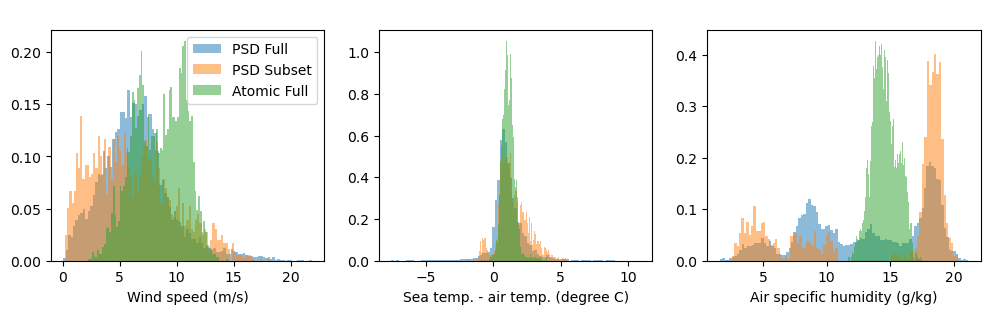

In [217]:
fig, axes = plt.subplots(1,3,figsize=[12,3])
snumber = len(ds_clean.U.values)
xr.plot.hist(ds_clean.U, bins=round(snumber/100), ax=axes[0], density=True, alpha=0.5, label='PSD Full')
# xr.plot.hist(ds_clean.tsnk, bins=round(snumber/100), ax=axes[1], density=True, alpha=0.5)
xr.plot.hist(ds_clean.tsnk-ds_clean.ta, bins=round(snumber/100), ax=axes[1], density=True, alpha=0.5)
xr.plot.hist(ds_clean.qa, bins=round(snumber/100), ax=axes[2], density=True, alpha=0.5)

ds_sub = ds_clean.where(ds_clean.pcode.isin([68,67,72,73]), drop=True)
snumber = len(ds_sub.U.values)
print(snumber)
xr.plot.hist(ds_sub.U, bins=round(snumber/20), ax=axes[0], density=True, alpha=0.5, label='PSD Subset')
# xr.plot.hist(ds_sub.tsnk, bins=round(snumber/20), ax=axes[1], density=True, alpha=0.5)
xr.plot.hist(ds_sub.tsnk-ds_sub.ta, bins=round(snumber/20), ax=axes[1], density=True, alpha=0.5)
xr.plot.hist(ds_sub.qa, bins=round(snumber/20), ax=axes[2], density=True, alpha=0.5)

snumber = len(atomic.wspd.values)
xr.plot.hist(atomic.wspd, bins=round(snumber/50), ax=axes[0], density=True, alpha=0.5, label='Atomic Full')
# xr.plot.hist(atomic.tsea, bins=round(snumber/50), ax=axes[1], density=True, alpha=0.5)
xr.plot.hist(atomic.tsea-atomic.tair, bins=round(snumber/50), ax=axes[1], density=True, alpha=0.5)
xr.plot.hist(atomic.qair, bins=round(snumber/50), ax=axes[2], density=True, alpha=0.5)

axes[0].legend()
axes[0].set_xlabel('Wind speed (m/s)'); axes[0].set_title(' ')
# axes[1].set_xlabel('Sea temperature (degree C)'); axes[1].set_title(' ')
axes[1].set_xlabel('Sea temp. - air temp. (degree C)'); axes[1].set_title(' ')
axes[2].set_xlabel('Air specific humidity (g/kg)'); axes[2].set_title(' ')
# xr.plot.hist(ds_clean.U, bins=20, ax=axes[0], alpha=0.5)
# xr.plot.hist(ds_clean.tsnk, bins=20, ax=axes[1], alpha=0.5)
# xr.plot.hist(ds_clean.ta, bins=20, ax=axes[2], alpha=0.5)
# xr.plot.hist(ds_clean.qa, bins=20, ax=axes[3], alpha=0.5)

Text(0.5, 1.0, ' ')

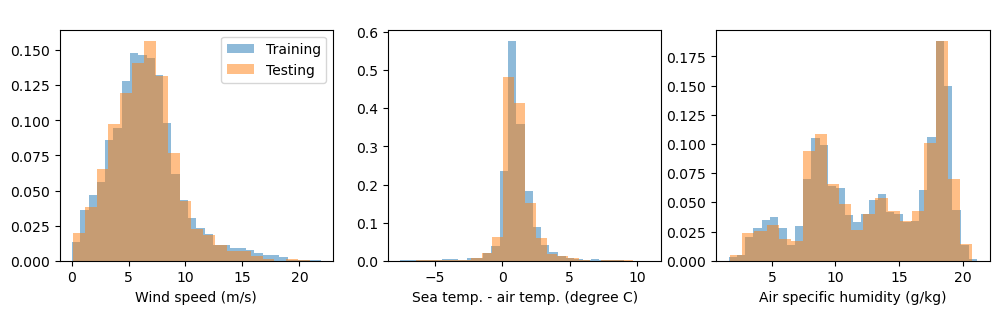

In [377]:
fig, axes = plt.subplots(1,3,figsize=[12,3])
snumber = len(ds_clean.U.values)
axes[0].hist(X_train[:,0]*std1+mean1, bins=30, density=True, alpha=0.5, label='Training')
axes[1].hist(X_train[:,1]*std2, bins=30, density=True, alpha=0.5)
axes[2].hist(X_train[:,2]*max3, bins=30, density=True, alpha=0.5)

axes[0].hist(X_test[:,0]*std1+mean1, bins=20, density=True, alpha=0.5, label='Testing')
axes[1].hist(X_test[:,1]*std2, bins=20, density=True, alpha=0.5)
axes[2].hist(X_test[:,2]*max3, bins=20, density=True, alpha=0.5)

axes[0].legend()
axes[0].set_xlabel('Wind speed (m/s)'); axes[0].set_title(' ')
axes[1].set_xlabel('Sea temp. - air temp. (degree C)'); axes[1].set_title(' ')
axes[2].set_xlabel('Air specific humidity (g/kg)'); axes[2].set_title(' ')

Text(0.5, 1.0, ' ')

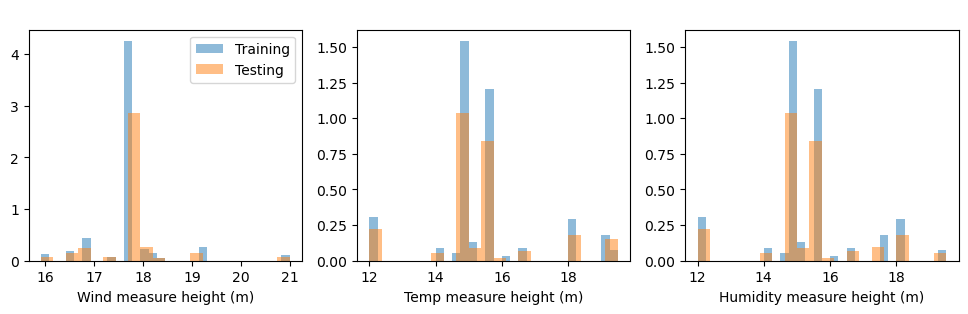

In [380]:
fig, axes = plt.subplots(1,3,figsize=[12,3])
snumber = len(ds_clean.U.values)
axes[0].hist(X_train[:,3]*max4, bins=30, density=True, alpha=0.5, label='Training')
axes[1].hist(X_train[:,4]*max5, bins=30, density=True, alpha=0.5)
axes[2].hist(X_train[:,5]*max6, bins=30, density=True, alpha=0.5)

axes[0].hist(X_test[:,3]*max4, bins=20, density=True, alpha=0.5, label='Testing')
axes[1].hist(X_test[:,4]*max5, bins=20, density=True, alpha=0.5)
axes[2].hist(X_test[:,5]*max6, bins=20, density=True, alpha=0.5)

axes[0].legend()
axes[0].set_xlabel('Wind measure height (m)'); axes[0].set_title(' ')
axes[1].set_xlabel('Temp measure height (m)'); axes[1].set_title(' ')
axes[2].set_xlabel('Humidity measure height (m)'); axes[2].set_title(' ')

### ATOMIC (from Cesar Sauvage)

In [2]:
ds = xr.open_dataset(base+'WHOI/EUREC4A_ATOMIC_RonBrown_10min_nav_met_sea_flux_20200109-20200212_v1.3.nc')

In [3]:
ds

<xarray.Dataset>
Dimensions:                           (trajectory: 1, obs: 5040)
Coordinates:
  * trajectory                        (trajectory) int32 -2147483647
    time                              (obs, trajectory) datetime64[ns] ...
    lat                               (obs, trajectory) float64 ...
    lon                               (obs, trajectory) float64 ...
    zu                                (obs, trajectory) float64 ...
    ztq                               (obs, trajectory) float64 ...
    zsea                              (obs, trajectory) float64 ...
    zu_ship                           (obs, trajectory) float64 ...
    ztq_ship                          (obs, trajectory) float64 ...
    zsea_ship                         (obs, trajectory) float64 ...
Dimensions without coordinates: obs
Data variables: (12/97)
    RonBrown                          (trajectory) |S1 ...
    crs                               float64 ...
    rain_instrument                   (trajectory) |S1 ...
    shortwave_radiation_instrument_1  (trajectory) |S1 ...
    shortwave_radiation_instrument_2  (trajectory) |S1 ...
    longwave_radiation_instrument_1   (trajectory) |S1 ...
    ...                                ...
    ch                                (obs, trajectory) float64 ...
    evap                              (obs, trajectory) float64 ...
    rough_u                           (obs, trajectory) float64 ...
    rough_t                           (obs, trajectory) float64 ...
    rough_q                           (obs, trajectory) float64 ...
    gust                              (obs, trajectory) float64 ...
Attributes: (12/33)
    title:                     ATOMIC (Atlantic Tradewind Ocean Atmosphere Me...
    summary:                   The data come from two sources, the NOAA PSL s...
    keywords:                  Earth Science > Atmosphere > Atmospheric Press...
    keywords_vocabulary:       GCMD Earth Science Keywords. Version 8.6
    comment:                   The PSL data (variables without suffix) should...
    instrument:                In Situ Instruments from NOAA PSL and the perm...
    ...                        ...
    cdm_data_type:             Trajectory
    date_created:              2021-03-30T16:13:03Z
    date_modified:             2021-03-30T16:13:03Z
    standard_name_vocabulary:  CF Standard Name Table v41
    ncei_template_version:     NCEI_NetCDF_Trajectory_Template_v2.0
    Conventions:               CF-1.6, ACDD-1.3

(0.0, 1.0)

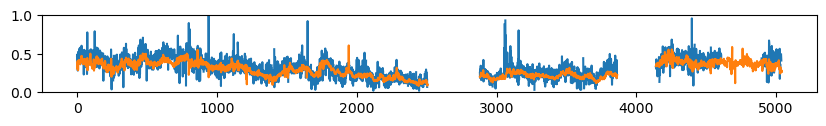

In [12]:
fig = plt.figure(figsize=[10,1])
plt.plot(ds.tau_streamwise_cov**0.5)
plt.plot(ds.ustar)
plt.ylim([0,1])


In [ ]:
fig = plt.figure(figsize=[10,1])
plt.plot(ds.tau_streamwise_cov**0.5)
plt.plot(ds.ustar)
plt.ylim([0,1])

In [4]:
xr.open_dataset(base+'WHOI/EUREC4A_ATOMIC_RonBrown_ROSR_sea_skin_temp_20200109_20200126_v1.3.nc')

<xarray.Dataset>
Dimensions:  (time: 4897)
Coordinates:
  * time     (time) timedelta64[ns] 8 days 00:00:00 ... 25 days 00:00:00
Data variables:
    lat      (time) float64 ...
    lon      (time) float64 ...
    tskin    (time) float64 ...
Attributes: (12/35)
    title:                                     ROSR Level 2 sea surface skin/...
    project:                                   ATOMIC
    platform:                                  R/V Ronald H. Brown
    instrument:                                ROSR
    version:                                   1.3
    summary:                                   ROSR ship-based skin SST data
    ...                                        ...
    instrument_vertical_angles:                Radiometer makes measurements ...
    keywords:                                  Oceans > Ocean Temperature > S...
    keywords_vocabulary:                       NASA Global Change Master Dire...
    standard_name_vocabulary:                  NetCDF Climate and Forecast (C...
    geospatial_lat_units:                      degree_north
    geospatial_lon_units:                      degree_east

### Bazzard Bay Tower (from Seth Zippel)

In [381]:
import scipy.io as spio
import mat73
data_dict = mat73.loadmat(base + 'Zippel/zippel2024.mat')
# mat = spio.loadmat(base + 'zippel2024.mat', squeeze_me=True)

In [383]:
x = data_dict['mNode_20m']['u_bar'][0]
x = x[~np.isnan(x)]
x.shape

(3585,)

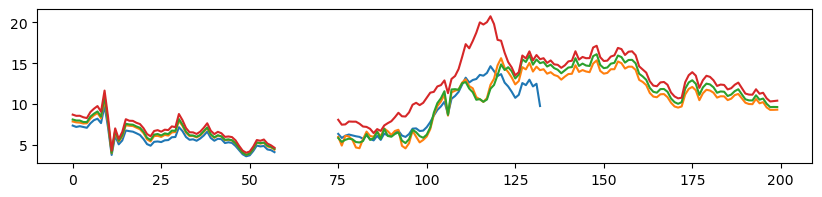

In [44]:
fig = plt.figure(figsize=[10,2])
plt.plot(data_dict['mNode_20m']['u_bar'][0][400:600])
plt.plot(data_dict['mNode_20m']['u_bar'][1][400:600])
plt.plot(data_dict['mNode_20m']['u_bar'][2][400:600])
plt.plot(data_dict['mNode_20m']['u_bar'][3][400:600])

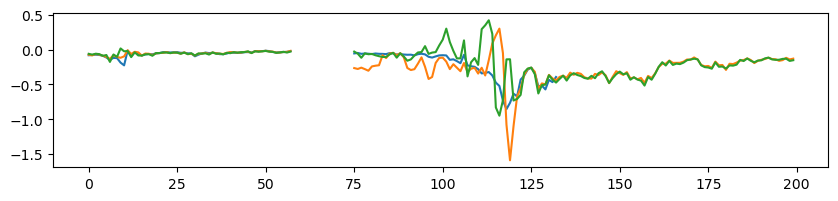

In [43]:
fig = plt.figure(figsize=[10,2])
plt.plot(data_dict['mNode_20m']['uw_bar'][0][400:600])
plt.plot(data_dict['mNode_20m']['uw_bar'][1][400:600])
plt.plot(data_dict['mNode_20m']['uw_bar'][2][400:600])
# plt.plot(data_dict['mNode_20m']['vw_bar'][0][0:1000])

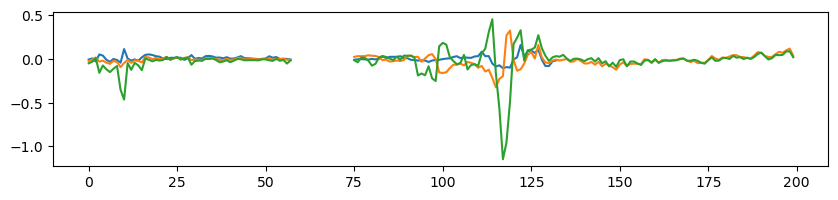

In [45]:
fig = plt.figure(figsize=[10,2])
plt.plot(data_dict['mNode_20m']['vw_bar'][0][400:600])
plt.plot(data_dict['mNode_20m']['vw_bar'][1][400:600])
plt.plot(data_dict['mNode_20m']['vw_bar'][2][400:600])
# plt.plot(data_dict['mNode_20m']['vw_bar'][0][0:1000])

### FLIP (from Luc Lenain)

HiRes: 397 samples from 2 boom heights in _ASIFLUX_WAVE_1_DESPIKED_SOFT_FCUT20_20130625.mat_ and _ASIFLUX_WAVE_2_DESPIKED_SOFT_FCUT20_20130625.mat_ separately.

In [11]:
''' https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.loadmat.html
    By default SciPy reads MATLAB structs as structured NumPy arrays where the 
    dtype fields are of type object and the names correspond to the MATLAB struct field names.'''
import scipy.io as spio
base = '/Users/jwu/Work/Code/mlflux/data/'
data_dict1 = spio.loadmat(base + 'FLIP/HiRes2010/ASIFLUX_WAVE_1_DESPIKED_SOFT_FCUT20_20130625.mat',)
data_dict2 = spio.loadmat(base + 'FLIP/HiRes2010/ASIFLUX_WAVE_2_DESPIKED_SOFT_FCUT20_20130625.mat',)
print(data_dict1['EC_CSAT1'][0,0].dtype.names)
print(data_dict2['EC_CSAT2'][0,0].dtype.names)

('Computed_On', 'time', 'z', 'mUxyz', 'mUxy', 'mUx', 'mUy', 'mUz', 'COV_UxUx', 'COV_UyUy', 'COV_UzUz', 'COV_UxyUxy', 'COV_UxUy', 'COV_UxUz', 'COV_UyUz', 'COV_UxUx_ATS', 'COV_UyUy_ATS', 'COV_UzUz_ATS', 'COV_UxyUxy_ATS', 'COV_UxUy_ATS', 'COV_UxUz_ATS', 'COV_UyUz_ATS', 'ustar', 'tau_x', 'tau_y', 'tau', 'zon', 'rho_a', 'T_hmp', 'Ts', 'Rs_downwell', 'Rs_upwell', 'Rir_downwell', 'Rir_upwell', 'P0', 'P', 'q0', 'theta0', 'Ts_hmp', 'theta_hmp', 'theta_virtual_hmp', 'q_hmp', 'COV_Ts_hmp', 'COV_theta_hmp', 'COV_theta_virtual_hmp', 'COV_q_hmp', 'COV_Uz_Ts_hmp', 'COV_Ux_theta_hmp', 'COV_Uy_theta_hmp', 'COV_Uz_theta_hmp', 'COV_Uz_theta_virtual_hmp', 'COV_Uz_q_hmp', 'Latent_Heat_Flux', 'Sensible_Heat_Flux', 'theta_star_hmp', 'q_star_hmp', 'L_hmp', 'ZoverL_hmp', 'psim_hmp', 'psit_hmp', 'psiq_hmp', 'zo_hmp', 'zot_hmp', 'zoq_hmp', 'U10_hmp', 'q10_hmp', 'theta10_hmp', 'L10_hmp', 'CD_hmp', 'CT_hmp', 'CQ_hmp', 'U10n_hmp', 'q10n_hmp', 'theta10n_hmp', 'L10n_hmp', 'CD10n_hmp', 'CT10n_hmp', 'CQ10n_hmp', 'Ts_li

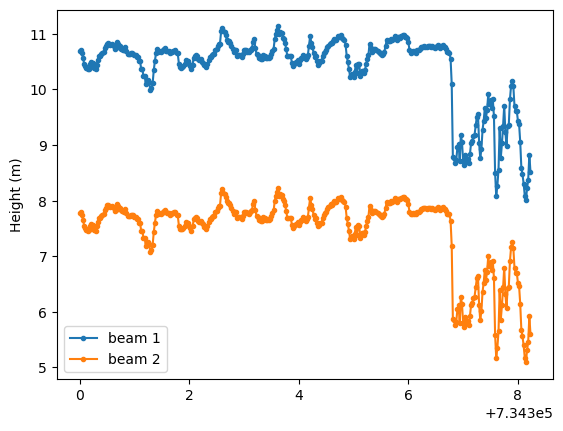

In [53]:
plt.plot(data_dict1['EC_CSAT1'][0,0]['time'][0], data_dict1['EC_CSAT1'][0,0]['z'][0], '.-', label='beam 1')
plt.plot(data_dict2['EC_CSAT2'][0,0]['time'][0], data_dict2['EC_CSAT2'][0,0]['z'][0], '.-', label='beam 2')
plt.ylabel('Height (m)')
plt.legend()

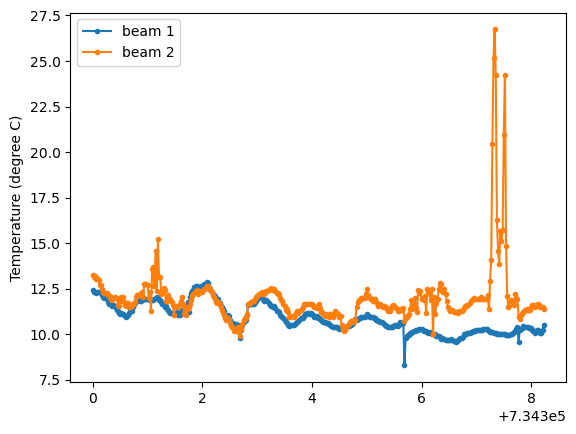

In [54]:
plt.plot(data_dict1['EC_CSAT1'][0,0]['time'][0], data_dict1['EC_CSAT1'][0,0]['Ts_licor'][0] - 273.15, '.-', label='beam 1')
plt.plot(data_dict2['EC_CSAT2'][0,0]['time'][0], data_dict2['EC_CSAT2'][0,0]['Ts_licor'][0] - 273.15, '.-', label='beam 2')
plt.ylabel('Temperature (degree C)')
plt.legend()

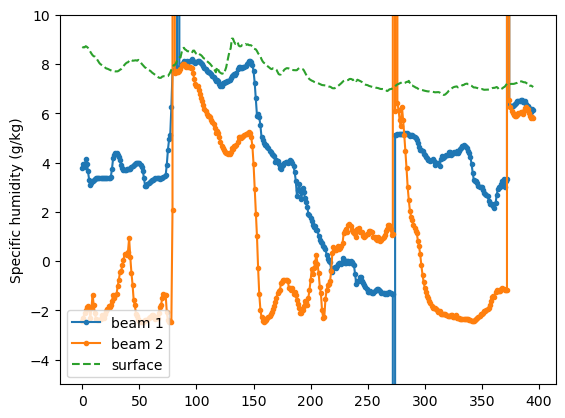

In [56]:
plt.plot(data_dict1['EC_CSAT1'][0,0]['q_licor'][0]*1000, '.-', c='C0', label='beam 1')
plt.plot(data_dict2['EC_CSAT2'][0,0]['q_licor'][0]*1000, '.-', c='C1', label='beam 2')
plt.plot(data_dict1['EC_CSAT1'][0,0]['q0'][0]*1000, '--', c='C2', label='surface')
plt.ylabel('Specific humidity (g/kg)')
plt.ylim([-5,10])
plt.legend(loc='lower left')

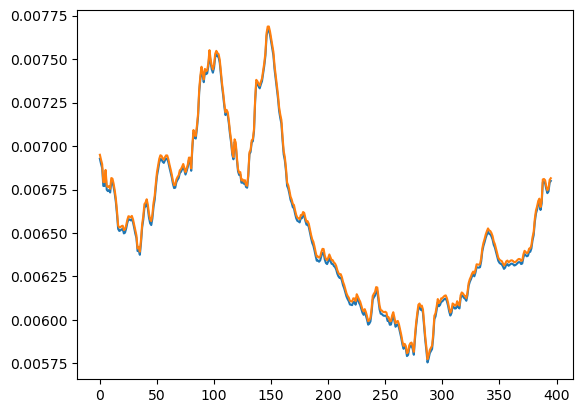

In [26]:
plt.plot(data_dict1['EC_CSAT1'][0,0]['q_hmp'][0])
plt.plot(data_dict2['EC_CSAT2'][0,0]['q_hmp'][0])

397
390
397
390


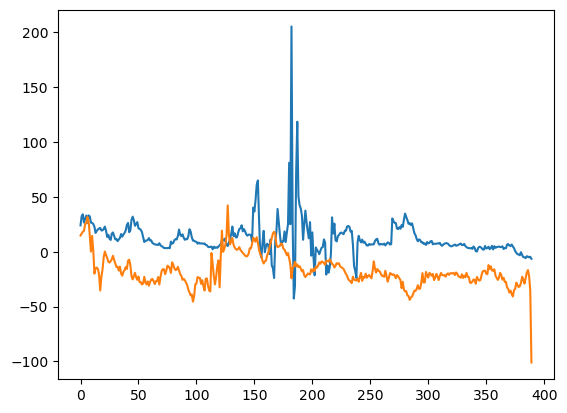

In [122]:
x = data_dict['EC_CSAT1'][0,0]['Latent_Heat_Flux'][0]
print(len(x))
x = x[~np.isnan(x)]
x = x[np.where(abs(x)<1e+10)] # Don't know why there are some huge values
print(len(x))
x.max()

plt.plot(x)

x = data_dict['EC_CSAT1'][0,0]['Sensible_Heat_Flux'][0]
print(len(x))
x = x[~np.isnan(x)]
x = x[np.where(abs(x)<1e+10)] # Don't know why there are some huge values
print(len(x))
x.max()

plt.plot(x)

SoCal: 581 points in _ASIFLUX_WINDFRAME_W0_UWcorrected_nfft36000_RAW_with_TSC.mat_

In [57]:
SoCal = spio.loadmat(base + 'FLIP/SoCal2013/ASIFLUX_WINDFRAME_W0_UWcorrected_nfft36000_RAW_with_TSC.mat',)
print(SoCal['EC_FAST_1'][0,0].dtype.names)

('Computed_On', 'time', 'T', 'T_virtual', 'theta', 'theta_virtual', 'q', 'COV_T_T', 'COV_theta_theta', 'COV_theta_theta_virtual', 'COV_q_q', 'COV_U_theta', 'COV_V_theta', 'COV_W_theta', 'COV_W_theta_virtual', 'COV_W_T', 'COV_W_Q', 'LatentHeatFlux', 'SensibleHeatFlux', 'theta_star', 'q_star', 'L1', 'L2', 'ZoverL1', 'ZoverL2', 'psim', 'psit', 'psiq', 'zo', 'zot', 'zoq', 'U10', 'q10', 'theta10', 'L10', 'CD10', 'CT10', 'CQ10', 'U10n', 'q10n', 'theta10n', 'L10n', 'CD10n', 'CT10n', 'CQ10n')


(-0.1, 0.1)

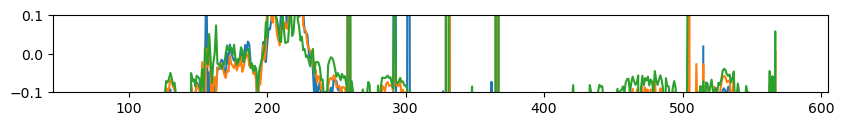

In [76]:
fig = plt.figure(figsize=[10,1])
plt.plot(SoCal['EC_FAST_1'][0,0]['ZoverL1'][0])
plt.plot(SoCal['EC_FAST_2'][0,0]['ZoverL1'][0])
plt.plot(SoCal['EC_FAST_3'][0,0]['ZoverL1'][0])
plt.ylim([-0.1,0.1])

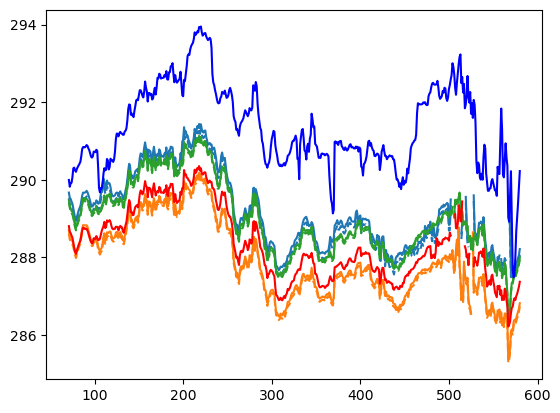

In [83]:
plt.plot(SoCal['EC_FAST_1'][0,0]['theta'][0], '-', c='C0')
plt.plot(SoCal['EC_FAST_1'][0,0]['T'][0], '--', c='C0')
plt.plot(SoCal['EC_FAST_2'][0,0]['theta'][0], '-', c='C1')
plt.plot(SoCal['EC_FAST_2'][0,0]['T'][0], '--', c='C1')
plt.plot(SoCal['EC_FAST_3'][0,0]['theta'][0], '-', c='C2')
plt.plot(SoCal['EC_FAST_3'][0,0]['T'][0], '--', c='C2')
plt.plot(SoCal['EC_FAST_4'][0,0]['theta'][0], '-', c='Red')
plt.plot(SoCal['EC_FAST_5'][0,0]['theta'][0], '-', c='Blue')

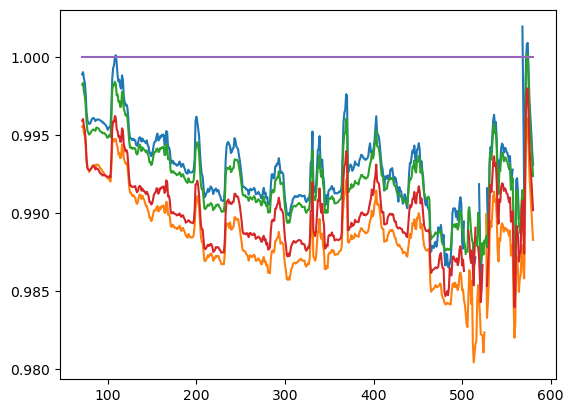

In [89]:
plt.plot(SoCal['EC_FAST_1'][0,0]['theta'][0]/SoCal['EC_FAST_5'][0,0]['theta'][0], '-')
plt.plot(SoCal['EC_FAST_2'][0,0]['theta'][0]/SoCal['EC_FAST_5'][0,0]['theta'][0], '-')
plt.plot(SoCal['EC_FAST_3'][0,0]['theta'][0]/SoCal['EC_FAST_5'][0,0]['theta'][0], '-')
plt.plot(SoCal['EC_FAST_4'][0,0]['theta'][0]/SoCal['EC_FAST_5'][0,0]['theta'][0], '-')
plt.plot(SoCal['EC_FAST_5'][0,0]['theta'][0]/SoCal['EC_FAST_5'][0,0]['theta'][0], '-')

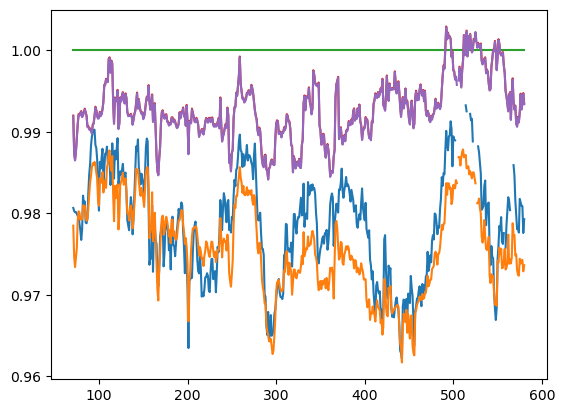

In [90]:
plt.plot(SoCal['EC_FAST_1'][0,0]['q'][0]/SoCal['EC_FAST_3'][0,0]['q'][0])
plt.plot(SoCal['EC_FAST_2'][0,0]['q'][0]/SoCal['EC_FAST_3'][0,0]['q'][0])
plt.plot(SoCal['EC_FAST_3'][0,0]['q'][0]/SoCal['EC_FAST_3'][0,0]['q'][0])
plt.plot(SoCal['EC_FAST_4'][0,0]['q'][0]/SoCal['EC_FAST_3'][0,0]['q'][0])
plt.plot(SoCal['EC_FAST_5'][0,0]['q'][0]/SoCal['EC_FAST_3'][0,0]['q'][0])